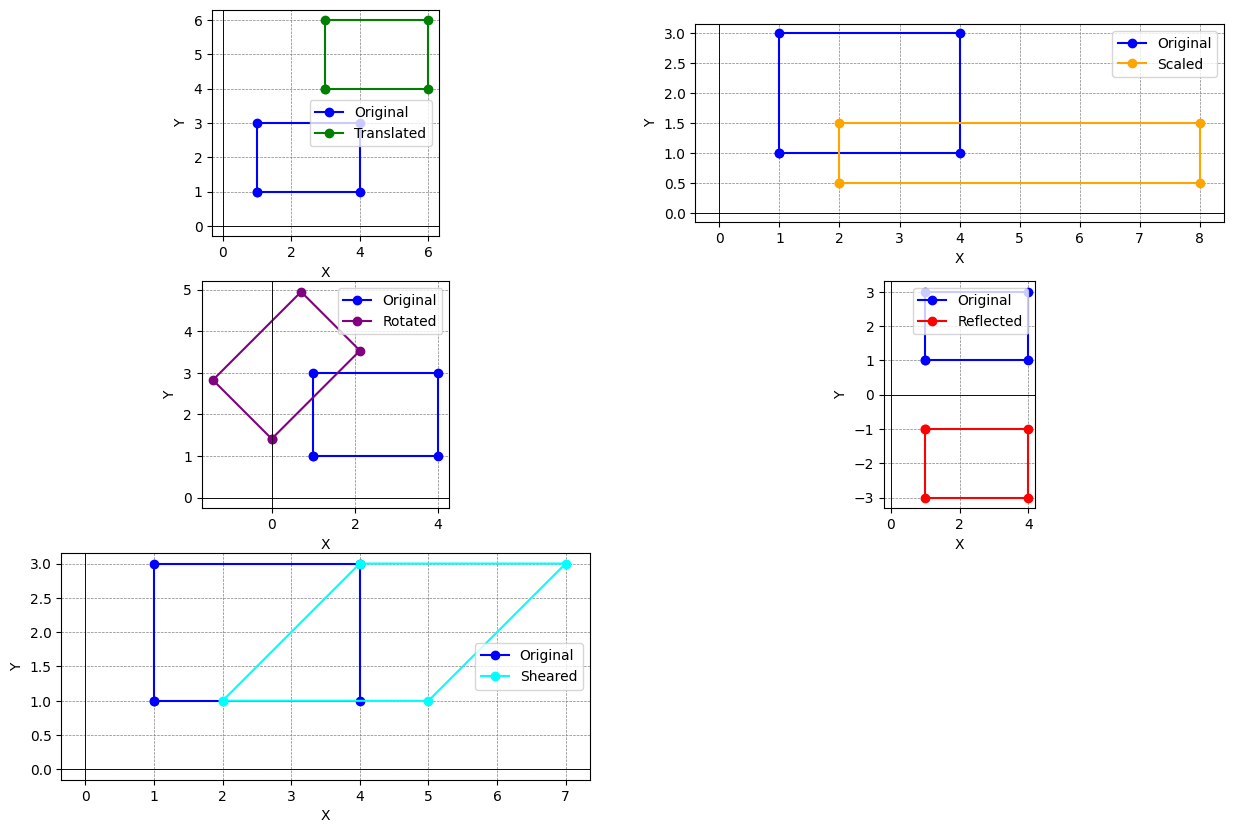

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(points, title, color='blue', label=None):
    points = np.append(points, points[:1], axis=0)
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color, label=label)
    if label:
        plt.legend()
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.gca().set_aspect('equal', adjustable='box')

def translate(points, tx, ty):
    """Applies translation transformation."""
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    translated_points = points_homogeneous @ translation_matrix.T
    return translated_points[:, :2]

def scale(points, sx, sy):
    """Applies scaling transformation."""
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    scaled_points = points_homogeneous @ scaling_matrix.T
    return scaled_points[:, :2]

def rotate(points, angle):
    """Applies rotation transformation."""
    rad = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    rotated_points = points_homogeneous @ rotation_matrix.T
    return rotated_points[:, :2]

def reflect(points, axis):
    """Applies reflection transformation."""
    if axis == 'x':
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose 'x', 'y', or 'origin'.")

    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    reflected_points = points_homogeneous @ reflection_matrix.T
    return reflected_points[:, :2]

def shear(points, shx, shy):
    """Applies shearing transformation."""
    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    sheared_points = points_homogeneous @ shearing_matrix.T
    return sheared_points[:, :2]


rectangle = np.array([
    [1, 1],
    [4, 1],
    [4, 3],
    [1, 3]
])

plt.figure(figsize=(15, 10))

# Translation
translated = translate(rectangle, 2, 3)
plt.subplot(3, 2, 1)
plot_shape(rectangle, "Translation", 'blue', label="Original")
plot_shape(translated, "", 'green', label="Translated")

# Scaling
scaled = scale(rectangle, 2, 0.5)
plt.subplot(3, 2, 2)
plot_shape(rectangle, "Scaling", 'blue', label="Original")
plot_shape(scaled, "", 'orange', label="Scaled")

# Rotation
rotated = rotate(rectangle, 45)
plt.subplot(3, 2, 3)
plot_shape(rectangle, "Rotation", 'blue', label="Original")
plot_shape(rotated, "", 'purple', label="Rotated")

# Reflection
reflected = reflect(rectangle, 'x')
plt.subplot(3, 2, 4)
plot_shape(rectangle, "Reflection", 'blue', label="Original")
plot_shape(reflected, "", 'red', label="Reflected")

# Shearing
sheared = shear(rectangle, 1, 0)
plt.subplot(3, 2, 5)
plot_shape(rectangle, "Shearing", 'blue', label="Original")
plot_shape(sheared, "", 'cyan', label="Sheared")

--2025-01-23 05:15:24--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  2.36MB/s    in 0.2s    

2025-01-23 05:15:24 (2.36 MB/s) - ‘lena.png’ saved [473831/473831]



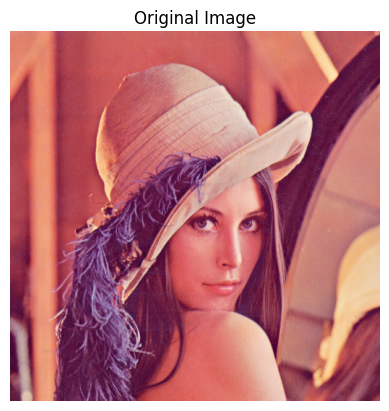

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png -O lena.png
image = cv2.imread('lena.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


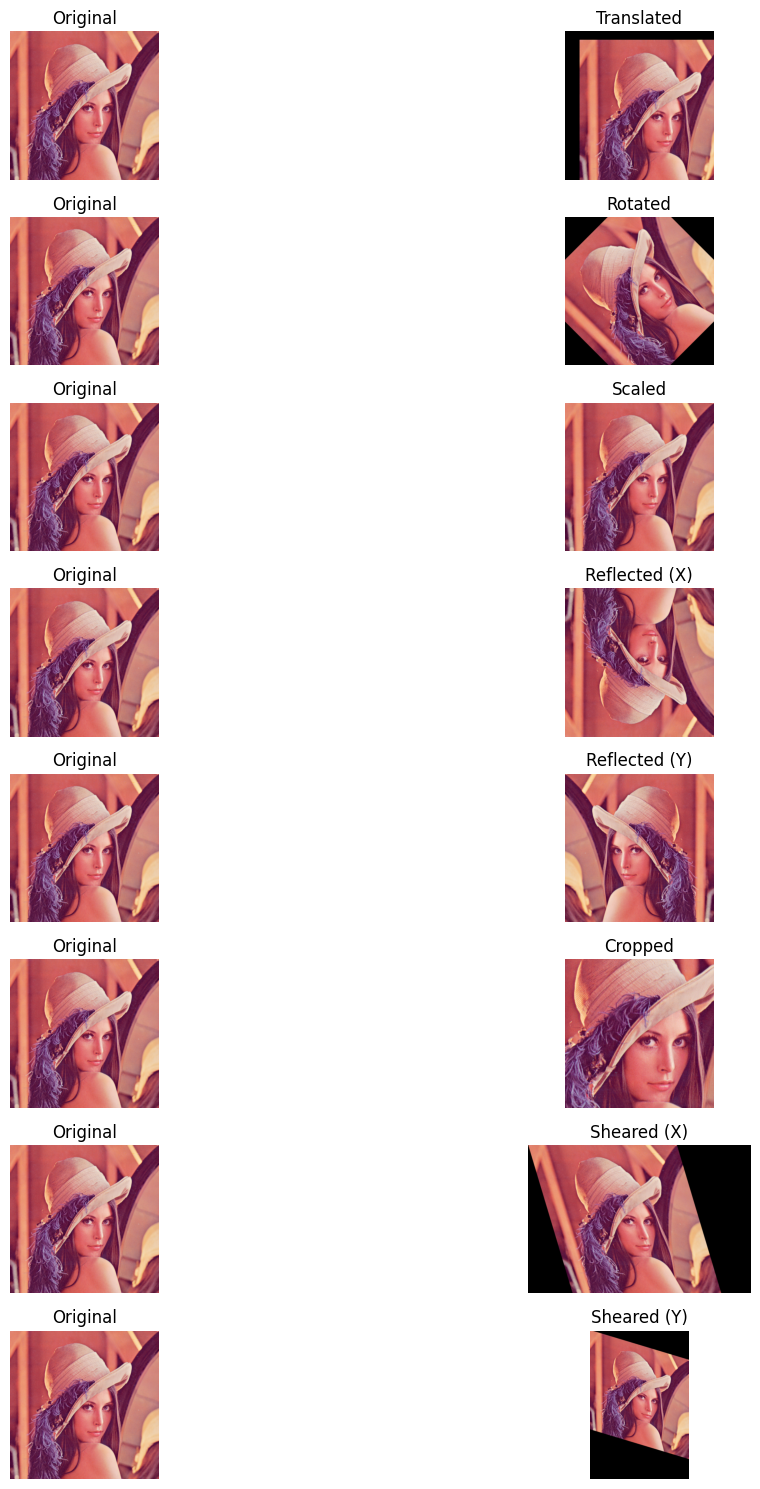

In [ ]:


# Function to convert images to uint8 if necessary
def to_uint8(image):
    if image.dtype != np.uint8:
        image = np.clip(image, 0, 255)
        image = image.astype(np.uint8)
    return image

# 1. Translation
def translate_image(image, tx, ty):
    rows, cols, _ = image.shape
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated = translate_image(image, 50, 30)

# 2. Rotation
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated = rotate_image(image, 45)

# 3. Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled = scale_image(image, 1.5, 1.5)

# 4. Reflection
def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    return reflected_image

reflected_x = reflect_image(image, 'x')
reflected_y = reflect_image(image, 'y')

# 5. Cropping
def crop_image(image, start_x, start_y, end_x, end_y):
    cropped_image = image[start_y:end_y, start_x:end_x]
    return cropped_image

cropped = crop_image(image, 100, 100, 400, 400)

# 6. Shearing in x-axis
def shear_image_x(image, shear_factor):
    rows, cols, _ = image.shape
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (int(cols * 1.5), rows))
    return sheared_image

sheared_x = shear_image_x(image, 0.3)

# 7. Shearing in y-axis
def shear_image_y(image, shear_factor):
    rows, cols, _ = image.shape
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, int(rows * 1.5)))
    return sheared_image

sheared_y = shear_image_y(image, 0.3)

images = [to_uint8(transformed) for transformed in [translated, rotated, scaled, reflected_x, reflected_y, cropped, sheared_x, sheared_y]]

titles = [
    "Translated", "Rotated", "Scaled",
    "Reflected (X)", "Reflected (Y)",
    "Cropped", "Sheared (X)", "Sheared (Y)"
]

plt.figure(figsize=(15, 15))
for i, (transformed_image, title) in enumerate(zip(images, titles)):
    plt.subplot(8, 2, 2 * i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Original")
    plt.axis('off')

    plt.subplot(8, 2, 2 * i + 2)
    plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()
